In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%run '/content/drive/My Drive/PLATZI-Documentos/1.Practice_projects/GitHub/Learning-AI-and-ML-with-a-Marketing-Campaign-dataset/3.-Standardization, PCA & K_Means.ipynb'

General settings

In [99]:
mk = mk.astype({'clusters':'category'})
mk = mk.sort_values('clusters')
colors= ['#7497ED','#EE4C87','#38E542']
sns_colors = {0:'#7497ED', 1:'#EE4C87', 2:'#38E542'}
labels1=['Cluster 1', 'Cluster 2', 'Cluster 3']
labels2=['1', '2', '3']

### **General view of the cluster´s universe**

Text(0, 0.5, ' ')

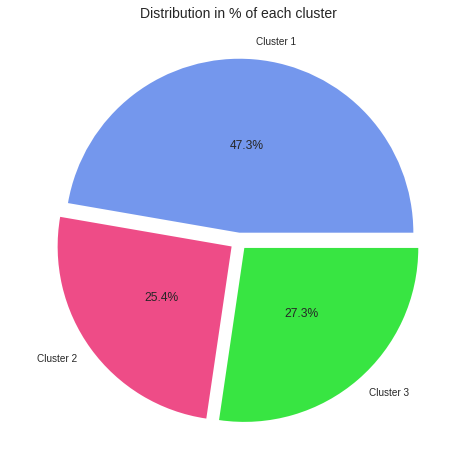

In [100]:
plt.subplots(1, 1, figsize=(8,8))

data = mk.groupby("clusters")['Income'].count()
g1 = data.plot(kind='pie', autopct="%.1f%%", labels=labels1, colors= colors, explode=[0.05]*3, pctdistance=0.5, legend=[] )
g1.set_title("Distribution in % of each cluster", fontsize=14)
g1.set_ylabel(' ')

### **General characteristics of the population**

Let´s start to analyze the characteristics of each cluster

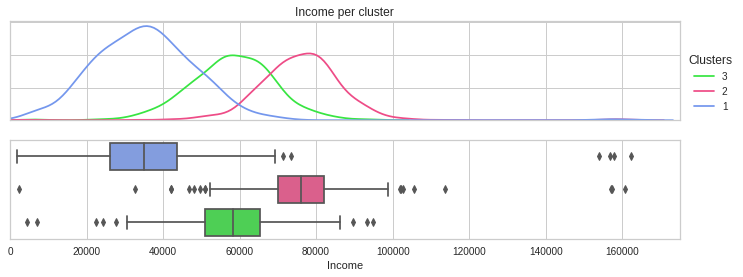

In [101]:
# Income distribution per cluster
fig, ax = plt.subplots(2, 1, figsize=(12,4))

g1 = sns.kdeplot(mk['Income'],hue=mk['clusters'],palette= sns_colors ,ax = ax[0])
g1.set(yticklabels=[], xticklabels=[], title='Income per cluster', ylabel=None, xlabel=None)
g1.legend(labels=labels2[::-1],
        title="Clusters",
        loc="lower left",
        bbox_to_anchor=(1, 0, 0.5, 1))
ax[0].set_xlim(0,175000)

g2= sns.boxplot(data=mk, x='Income', y= 'clusters',palette= sns_colors, ax = ax[1])
g2.set(yticklabels=[], ylabel=None)
ax[1].set_xlim(0,175000)
plt.show()

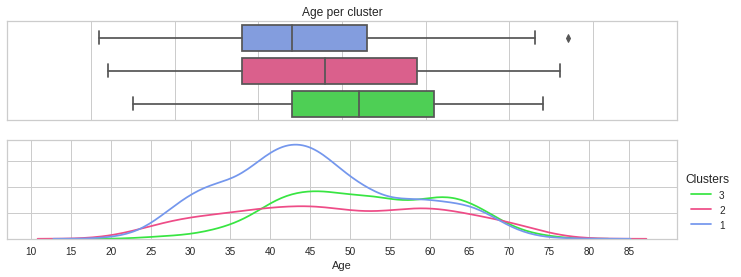

In [102]:
# Age distribution per cluster
fig, ax = plt.subplots(2, 1, figsize=(12,4))

g2= sns.boxplot(data=mk, x='Age', y= 'clusters',palette= sns_colors, ax = ax[0])
g2.set(yticklabels=[], xticklabels=[], title='Age per cluster', ylabel=None, xlabel=None)
ax[0].set_xlim(10,90)

g1 = sns.kdeplot(mk['Age'],hue=mk['clusters'],palette= sns_colors,ax = ax[1])
g1.set(yticklabels=[], ylabel=None)
g1.legend(labels=labels2[::-1],
        title="Clusters",
        loc="lower left",
        bbox_to_anchor=(1, 0, 0.5, 1))
plt.xticks(range(10, 90, 5))
plt.show()

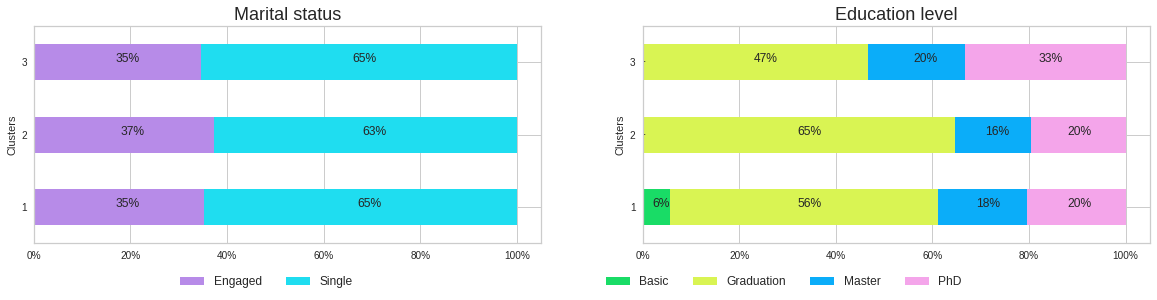

In [103]:
# Material status & Education level & number of childen in each cluster:

# Marital status: generating the dataframe:
status= pd.DataFrame(mk.groupby(['clusters','Marital_Status'])[['Education']].count()).reset_index()
status = status.pivot_table(values='Education', index='clusters', columns='Marital_Status').reset_index()

# Education level: generating the dataframe:
education = pd.DataFrame(mkd.groupby('clusters')[['Education_Basic','Education_Graduation','Education_Master','Education_PhD']].sum()).reset_index()

# Generating the graph:
fig, ax = plt.subplots(1,2, figsize=(20,4))
ax = ax.ravel()

barh_100_per(status, num_charts='several', axes=0, yticklabels=['1','2','3'], ylabel='Clusters', labels=['Engaged','Single'], color=['#B78BE8','#1FDDF0'],
             title='Marital status', titlefs=18, bbox_position= [0.7, 0], labelfs=12, box_ncol=500)

barh_100_per(education, num_charts='several',axes=1, yticklabels=['1','2','3'], ylabel='Clusters', labels=['Basic','Graduation','Master','PhD'],
             color=['#19DC66','#D9F453','#0BADF9','#F4A5EA'], title= 'Education level')

plt.show()

In [97]:
# # Way to see the function´s details
# barh_100_per(status, info='+')

In [94]:
# def barh_100_per(dataset, num_charts='one',axes=0,fig_length=11,fig_width=5, yticklabels=None, ylabel=None, labels=None, color=None, title=None,
#                  titlefs=18, bbox_dimension= [-0.05, -0.1], bbox_position= [0.7, 0], labelfs=12, info=None, box_ncol=500):
#   h='''Remember: the dataset should have the following characteristics:
#     * The first column should contain the labels of each category (this is not used to compute calculations). That means that each row represent a bar that will be
#       drawn on the chart. This can be numerical or not.
#     * The following columns are the stacked categories, this means that each column will represent the segments in each bar that will be drawn on the chart. 
#       Rhis must be an integer.
#   Example of entry data:
#                                       clusters	  Marital_Status_Engaged    	Marital_Status_single	
#                                           0	               	687	                       372	
#                                           1	               	357	                       212	
#                                           2	               	400	                       212	
#   Other recomendations to follow:
#     * num_charts='one' or 'several'.
#         * When 'several' make sure you have ready a plt.subplots in the following way: 
#                                             fig, ax = plt.subplots(row,col, figsize=(length,width))
#                                             ax = ax.ravel()
#             * 'axes'=0 
#                 *You must indicate in which ax will be placed the chart, by defult this value is 0, but you can change it wit the argument 'axes'
#         * When 'one', 
#             * you can indicate the size of the figure with the following arguments: fig_length=11, fig_width=5 (by default they have the 11,5 size)
#     * yticklabels=None:
#         * It is possible to indicate the name of each ytick through a list with the desire names, for example: ['1','2','3'] in the case of 3 bars.
#     * labels=None
#         * It is possible to indicate the name of each segment of the bar through a list with the desire names, for example: ['Engaged','Single'].
#     * color=None
#         * Assign colors for each stacked segment through a list, for example: color=['#B78BE8','#1FDDF0']
#     * titlefs=18
#         * Title fontsize, by default is 18
#     * bbox_dimension= [-0.05, -0.1]
#         * By default the label´s box has assigned dimensions 
#     * bbox_position= [0.7, 0] --> [Horizontal, Vertical]
#         * By default the label´s box has assigned dimensions  
#     * labelfs=12
#         * Title fontsize, by default is 12
#     * info='+'
#         * Way to get information about this function.
#     '''
#   if info==None:
#     columns=list(dataset.columns)
#     for column in columns:
#       dataset=dataset.astype({column:'int64'})
#     dataset['Total'] = dataset.iloc[::,1::].sum(axis=1)
#     dataset1= dataset.iloc[::,1:-1].apply(lambda x: (x/dataset.Total)*100)
#     dataset1 = dataset1.reset_index()
#     m = dataset1.set_index('index')
#     gl=[]
#     xl=[]
#     yl=[]
#     sl=[]
#     for i in m.index:
#       for k in m.columns:
#         a = m.loc[i,[k]].values
#         y= i
#         s= str(round(float(a)))+'%'
#         if (len(xl)== 0):
#           x= int(a/2)
#           g= int(a)
#         elif y==yl[-1]:
#           g= int(a) + int(gl[-1])
#           x= int(int(a/2)+int(gl[-1]))
#         else:
#           g= int(a)
#           x= int(a/2)
#         xl.append(x)
#         yl.append(y)
#         sl.append(s)
#         gl.append(g)

#     # Conditionals:
#     if yticklabels == None:
#       yticklabels=list(dataset.iloc[::,0])
#     else:
#       yticklabels == yticklabels

#     if ylabel==None:
#       ylabel= list(dataset.columns)[0]
#     else:
#       ylabel= ylabel
    
#     if labels == None:
#       labels= list(m.columns)
#     else:
#       label=labels
    
#     if color == None:
#       color= None
#     else:
#       color=color
    
#     if title == None:
#       title= list(dataset.columns)[0]
#     else:
#       title= title
    
#     if box_ncol == 500:
#       box_ncol==len(m.columns)
#     else:
#       box_ncol==box_ncol

#     if num_charts=='one':
#       g1 = dataset1.plot.barh(x='index', stacked=True, color=color, legend=[], figsize=(fig_length,fig_width))
#       g1.set(yticklabels=yticklabels, ylabel=ylabel, xlabel=None)
#       g1.set_title(title, fontsize=titlefs)
#       for x,y,s in zip(xl,yl,sl):
#         if x == 0:
#           g1.text(x= x,y=y,s='.')
#         else:
#           g1.text(x= x,y=y,s=s)
#       fmt = '%.0f%%' 
#       xticks = mtick.FormatStrFormatter(fmt)
#       g1.xaxis.set_major_formatter(xticks)
#       g1.legend(labels=labels, ncol = box_ncol, bbox_to_anchor=(bbox_dimension[0], bbox_dimension[1], bbox_position[0], bbox_position[1]),
#                 fancybox=True, shadow=True, fontsize=labelfs)
#       plt.show()
#     else:
#       g1 = dataset1.plot.barh(x='index', stacked=True, color=color, legend=[],ax= ax[axes])
#       g1.set(yticklabels=yticklabels, ylabel=ylabel, xlabel=None)
#       g1.set_title(title, fontsize=titlefs)
#       for x,y,s in zip(xl,yl,sl):
#         if x == 0:
#           g1.text(x= x,y=y,s='.')
#         else:
#           g1.text(x= x,y=y,s=s)
#       fmt = '%.0f%%' 
#       xticks = mtick.FormatStrFormatter(fmt)
#       g1.xaxis.set_major_formatter(xticks)
#       g1.legend(labels=labels, ncol = box_ncol, bbox_to_anchor=(bbox_dimension[0], bbox_dimension[1], bbox_position[0], bbox_position[1]),
#                 fancybox=True, shadow=True, fontsize=labelfs)
        
#       return g1
#   else:
#     print(h)